#EDA Part

**1-** Import libraries, load the dataset and display basic information about the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from google.colab import files

In [2]:
uploaded = files.upload()

df = pd.read_csv('heart_disease_uci.csv')
df.head()

Saving heart_disease_uci.csv to heart_disease_uci.csv


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


providing statistical summary of the dataset

In [3]:
df.describe(include='all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


checkimg for any missing values

In [4]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


some column distributions #execute with dropna(), and used float or int values.

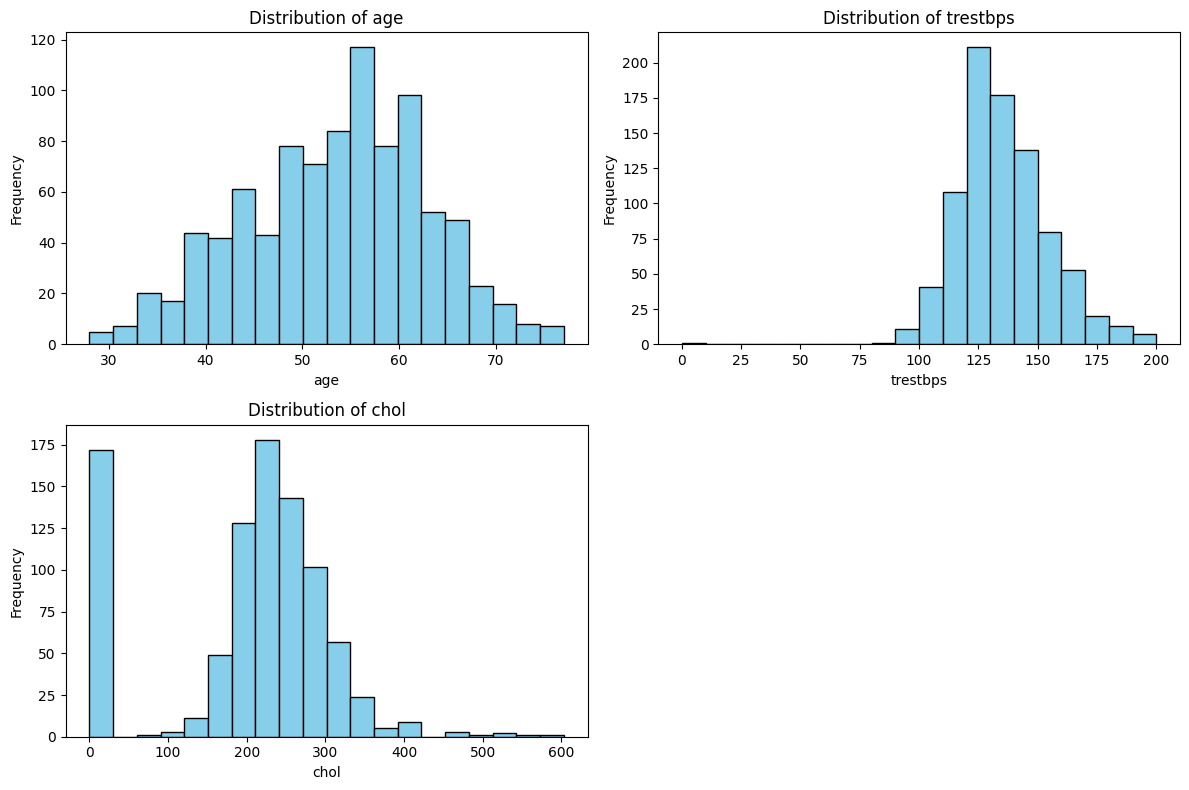

In [5]:
columns_to_plot = ['age', 'trestbps', 'chol']

# Plot distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**2-** Visualize dataset : Plot histogram, pie chart, bar plot and a boxplot

Histograms of all numerical columns

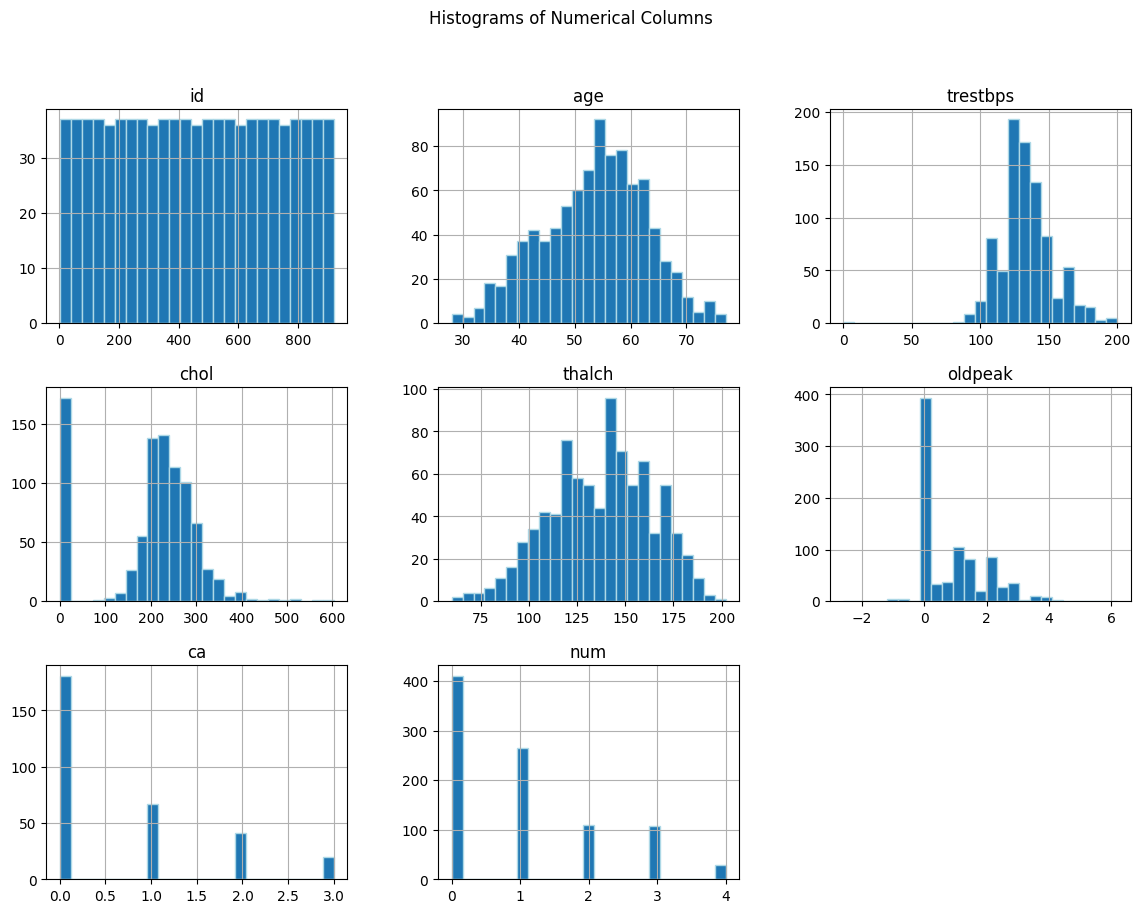

In [6]:
df.hist(figsize=(14, 10), bins=25, edgecolor='lightblue')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

bar plot for "sex" column to analyze gender dist.

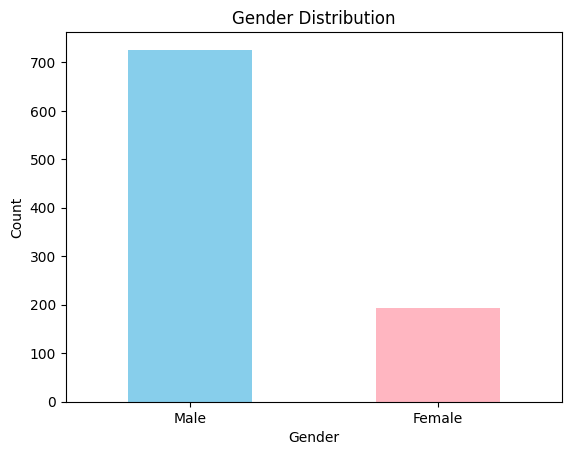

In [7]:
df['sex'].value_counts().plot(kind='bar', color=['skyblue','lightpink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

boxplot for outlier detection in cholesterol levels. It seems between 400-600 and at 0 we have some outliers.

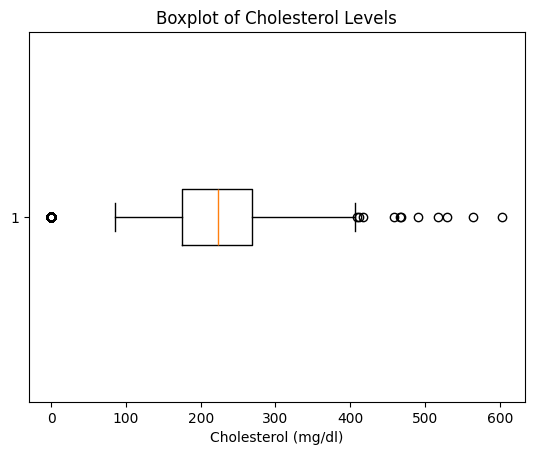

In [8]:
plt.boxplot(df['chol'].dropna(), vert=False)
plt.title('Boxplot of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dl)')
plt.show()

pie chart for the "num" column to visualize class dist.

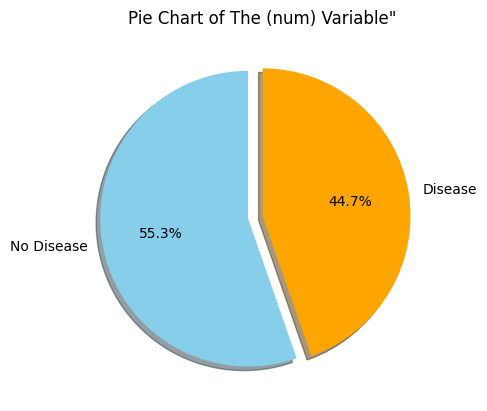

In [9]:
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
df['num'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['No Disease', 'Disease'],
    colors=['skyblue', 'orange'],
    explode=[0.1, 0],
    shadow=True
)
plt.title('Pie Chart of The (num) Variable"')
plt.ylabel('')
plt.show()

**3-** Handling missing values. There are indeed plenty...
Using you suggestion "simpleimputer"
- seperate cat and num values
- impute missing values for cat w/ most frequent value
- impute missing values for num. columns using mean
- Than check for missing values to confirm

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


#PCA and T-SNE Part

**4-** PCA and T-SNE Visualition

First we need to convert categorical data into numerical, then apply standardization and then apply PCA transformation.
- I identfy the cat. columns
- Than aplly OneHotEncoder to cat. columns
- And display the 10 first encoded rows to see

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head(10)

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.0,63.0,145.0,233.0,150.0,2.3,0.0,0.0,True,False,...,False,True,True,False,False,False,False,False,False,False
1,2.0,67.0,160.0,286.0,108.0,1.5,3.0,1.0,True,False,...,False,False,False,False,False,True,True,False,True,False
2,3.0,67.0,120.0,229.0,129.0,2.6,2.0,1.0,True,False,...,False,False,False,False,False,True,True,False,False,True
3,4.0,37.0,130.0,250.0,187.0,3.5,0.0,0.0,True,False,...,True,False,False,True,False,False,False,False,True,False
4,5.0,41.0,130.0,204.0,172.0,1.4,0.0,0.0,False,False,...,False,False,False,False,False,False,False,True,True,False
5,6.0,56.0,120.0,236.0,178.0,0.8,0.0,0.0,True,False,...,False,False,False,True,False,False,False,True,True,False
6,7.0,62.0,140.0,268.0,160.0,3.6,2.0,1.0,False,False,...,False,False,False,False,False,False,False,False,True,False
7,8.0,57.0,120.0,354.0,163.0,0.6,0.0,0.0,False,False,...,False,False,False,True,False,True,False,True,True,False
8,9.0,63.0,130.0,254.0,147.0,1.4,1.0,1.0,True,False,...,False,False,False,False,False,False,True,False,False,True
9,10.0,53.0,140.0,203.0,155.0,3.1,0.0,1.0,True,False,...,False,False,True,False,False,True,False,False,False,True


Standardizing the data for PCA and T-SNE and display tha shape

In [12]:
X = df_encoded.drop(columns=['num'])
y = df_encoded['num']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of standardized dataset:", X_scaled.shape)

Shape of standardized dataset: (920, 22)


determine the number of components needed to explain %90 variance. Otherwise the variance of cumulative components gone horibly wrong

In [31]:
pca_full = PCA().fit(X_scaled)
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()
components_90 = next(i for i, v in enumerate(cumulative_variance) if v >= 0.90) + 1

print(f"Number of components to explain 90% variance: {components_90}")

Number of components to explain 90% variance: 14


Apllying PCA with 14 components

In [39]:
from sklearn.decomposition import PCA #importing PCA cuz I forget to add in the begining

pca = PCA(n_components=14)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio by PCA Components:", pca.explained_variance_ratio_)

Explained Variance Ratio by PCA Components: [0.16072181 0.11926187 0.09680879 0.09200331 0.05982016 0.05647948
 0.05079548 0.04971621 0.04801508 0.04339235 0.03847397 0.03229833
 0.03174855 0.02608883]


reduce the dataset to 2 components and visualize my dataset (2D visualization) by using PCA

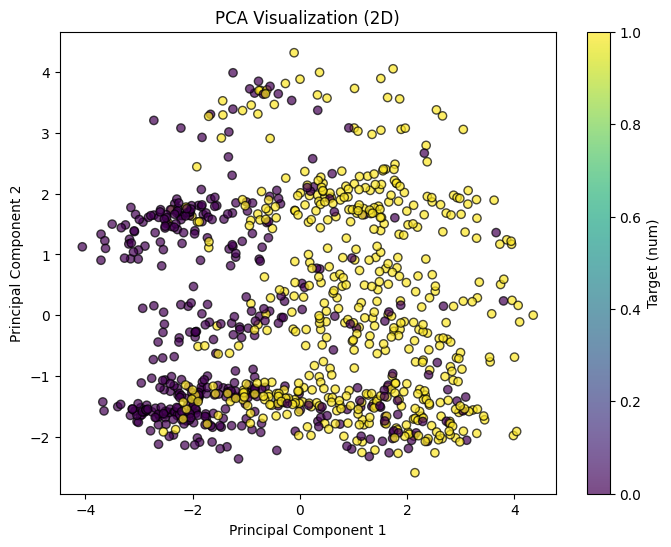

In [42]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title('PCA Visualization (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target (num)')
plt.show()

Apllying T-SNE, to reduce the data to 2 dimensions

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

print("Shape of T-SNE transformed data:", X_tsne.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Shape of T-SNE transformed data: (920, 2)


visualize my dataset (2D visualization) by using T-SNE

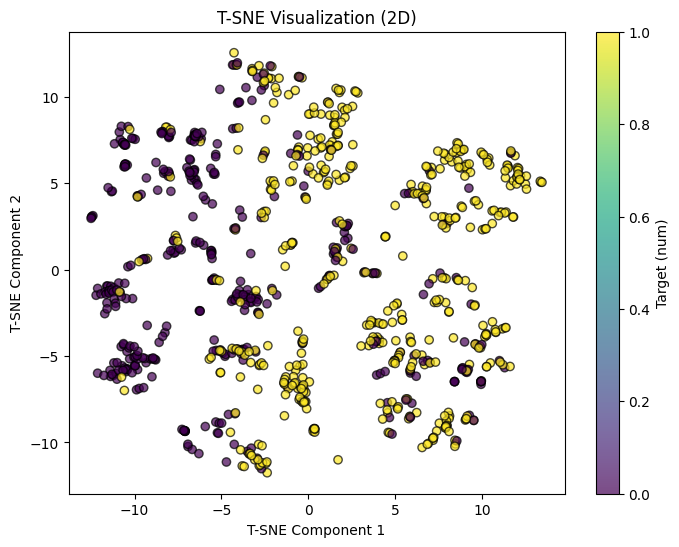

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title('T-SNE Visualization (2D)')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar(label='Target (num)')
plt.show()

**Comparing the result:**
- PCA is a method that shows data in a simpler way while keeping the biggest differences in the data. It works well if the data can be separated in a straight line.

- T-SNE is another method that works differently. It is good at showing small groups in the data and works better when the data has hidden patterns or groups that are not easy to see.

**5-** Explained variance ratio for each principal component (give values and plot bar graph of component)

Explained Variance Ratio for Each Principal Component:
Principal Component 1: 0.1607
Principal Component 2: 0.1193
Principal Component 3: 0.0968
Principal Component 4: 0.0920
Principal Component 5: 0.0598
Principal Component 6: 0.0565
Principal Component 7: 0.0508
Principal Component 8: 0.0497
Principal Component 9: 0.0480
Principal Component 10: 0.0434
Principal Component 11: 0.0385
Principal Component 12: 0.0323
Principal Component 13: 0.0317
Principal Component 14: 0.0261




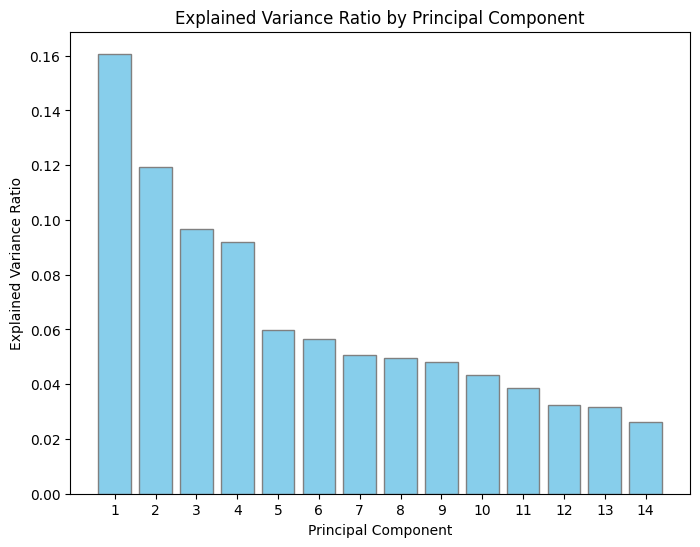

In [45]:
# display explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio for Each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {ratio:.4f}")
   # print("\n")

# plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue', edgecolor='gray')
print("\n")
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

**6-** Cumulative explained variance, both give values and plot line graph


Cumulative Explained Variance:
Principal Component 1: 0.1607
Principal Component 2: 0.2800
Principal Component 3: 0.3768
Principal Component 4: 0.4688
Principal Component 5: 0.5286
Principal Component 6: 0.5851
Principal Component 7: 0.6359
Principal Component 8: 0.6856
Principal Component 9: 0.7336
Principal Component 10: 0.7770
Principal Component 11: 0.8155
Principal Component 12: 0.8478
Principal Component 13: 0.8795
Principal Component 14: 0.9056




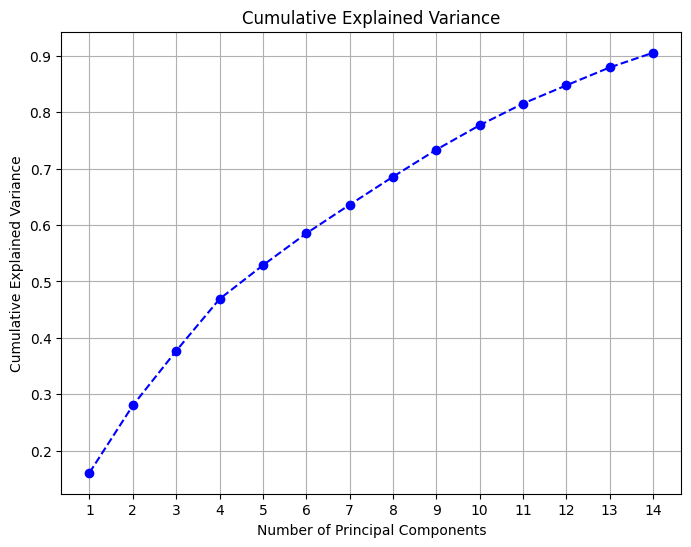

In [46]:
# compute cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# value print for cumulative explained variance for each component
print("\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance, 1):
    print(f"Principal Component {i}: {cum_var:.4f}")

# plot line graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
print("\n")
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

#Model Building Part

**7-** Build classification models using at least 3 different algorithms

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

split the dataset into training and testing

In [49]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# split PCA-reduced dataset with 14 components
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Original dataset shape:", X_train_orig.shape, X_test_orig.shape)
print("PCA-reduced dataset shape:", X_train_pca.shape, X_test_pca.shape)

Original dataset shape: (736, 22) (184, 22)
PCA-reduced dataset shape: (736, 14) (184, 14)


**8-** For each algoritm, I train 2 models.
- first one using the original features
- second one using PCA-reduced dataset

Traning with logisting regressions models with 2 features

In [50]:
# original features
lr_orig = LogisticRegression(max_iter=1000, random_state=42)
lr_orig.fit(X_train_orig, y_train)

# PCA features
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(max_iter=1000, random_state=42)

Train MLP classifier models with 2 features

In [51]:
# original features
mlp_orig = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_orig.fit(X_train_orig, y_train)

# PCA features
mlp_pca = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_pca.fit(X_train_pca, y_train_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

Train random forest classifier models with 2 models

In [52]:
# original features
rf_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_orig.fit(X_train_orig, y_train)

# PCA features
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier(random_state=42)

**Evaluation of The Models**
- Evaluate all six models using accuracy_score, confusion_matrix, and classification_report

Evaluate logistic regression modeles

In [61]:
# predictions for original features
y_pred_lr_orig = lr_orig.predict(X_test_orig)
print("Logistic Regression (Original Features):\n")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_orig))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_orig))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr_orig))

# predictions for PCA features
y_pred_lr_pca = lr_pca.predict(X_test_pca)
print("\n\nLogistic Regression (PCA Features):")
print("\nAccuracy:", accuracy_score(y_test_pca, y_pred_lr_pca))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_lr_pca))
print("\nClassification Report:\n", classification_report(y_test_pca, y_pred_lr_pca))

Logistic Regression (Original Features):

Accuracy: 0.8532608695652174

Confusion Matrix:
 [[62 13]
 [14 95]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.83      0.82        75
         1.0       0.88      0.87      0.88       109

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Logistic Regression (PCA Features):

Accuracy: 0.8152173913043478

Confusion Matrix:
 [[62 13]
 [21 88]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.83      0.78        75
         1.0       0.87      0.81      0.84       109

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



Evaluate MLP classifier models.

In [63]:
# predictions for original features
y_pred_mlp_orig = mlp_orig.predict(X_test_orig)
print("MLP Classifier (Original Features):")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp_orig))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp_orig))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp_orig))

# predictions for PCA features
y_pred_mlp_pca = mlp_pca.predict(X_test_pca)
print("\nMLP Classifier (PCA Features):")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_mlp_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_mlp_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_mlp_pca))

MLP Classifier (Original Features):
Accuracy: 0.8532608695652174
Confusion Matrix:
 [[69  6]
 [21 88]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.92      0.84        75
         1.0       0.94      0.81      0.87       109

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184


MLP Classifier (PCA Features):
Accuracy: 0.8586956521739131
Confusion Matrix:
 [[66  9]
 [17 92]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        75
         1.0       0.91      0.84      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Evaluate random forest classifier models

In [64]:
# predictions for original features
y_pred_rf_orig = rf_orig.predict(X_test_orig)
print("Random Forest (Original Features):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_orig))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_orig))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_orig))

# predictions for PCA features
y_pred_rf_pca = rf_pca.predict(X_test_pca)
print("\nRandom Forest (PCA Features):")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_rf_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_rf_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_rf_pca))

Random Forest (Original Features):
Accuracy: 0.8913043478260869
Confusion Matrix:
 [[67  8]
 [12 97]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        75
         1.0       0.92      0.89      0.91       109

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Random Forest (PCA Features):
Accuracy: 0.8641304347826086
Confusion Matrix:
 [[63 12]
 [13 96]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83        75
         1.0       0.89      0.88      0.88       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



**Comparisson**
- Logistic Regression: The model using original features performs better. PCA might have removed some important information, which caused a slight drop in accuracy and other metrics. Logistic regression seems to work better with the original dataset.
- MLP Classifier: The model using PCA features performs slightly better in terms of accuracy and overall metrics. This suggests that PCA might have reduced noise or irrelevant features, helping the MLP classifier focus on the most important aspects of the data.
- Random Forest: The model using original features performs better across all metrics. Random Forest can naturally handle high-dimensional data, so reducing the dataset with PCA might have removed valuable information. Original features allowed the model to achieve higher accuracy and better balance in precision, recall, and F1-score.

**Overall, there is no significant differences between using original features or PCA-reduced data. Most noticiable difference in the Random Forest model which maybe worth considired. I think the choice is depend on dataset complexity rather than performance differences.**